## 1. Linear SVM

In [437]:
from sklearn.svm import LinearSVC
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [438]:
X,y = datasets.make_blobs(centers=2,random_state=0)

In [439]:
df = pd.DataFrame(X,columns=['x1','x2'])
df['class'] = y
df

,x1,x2,class
0,4.218503,2.234192,1
1,0.907799,0.459844,1
2,-0.276525,5.081278,0
3,0.088484,2.322991,0
4,3.243297,1.214606,1
...,...,...,...
95,-1.576720,4.957406,0
96,1.411649,-1.325739,1
97,3.004688,0.985215,1
98,-0.637628,4.091047,0


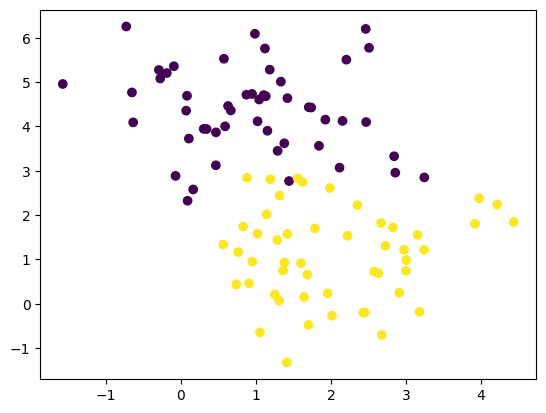

In [440]:
plt.scatter('x1','x2',c='class',data=df)

In [465]:
linear_svm = LinearSVC(C=1,max_iter=10e4).fit(X,y)

In [442]:
linear_svm.coef_

array([[ 0.17308442, -1.58307895]])

In [443]:
linear_svm.intercept_

array([4.00830441])

In [451]:
line = np.linspace(-15,15)

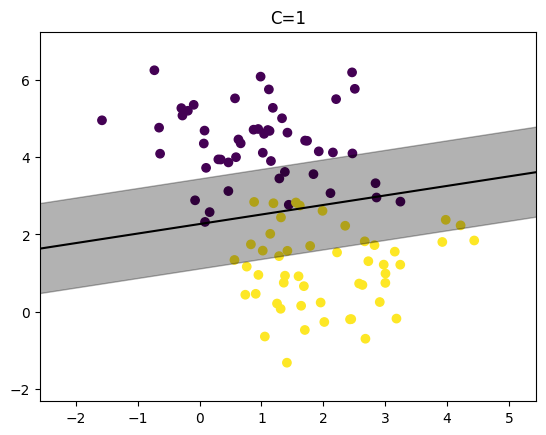

In [466]:
plt.scatter('x1','x2',c='class',data=df)

coef = linear_svm.coef_
intercept = linear_svm.intercept_
plt.plot(line,-(line*coef[:,0]+intercept)/coef[:,1],c=color)
plt.fill_between(line,-(line*coef[:,0]+intercept+1)/coef[:,1],-(line*coef[:,0]+intercept-1)/coef[:,1],color=color,alpha=0.3)

plt.xlim([min(df['x1'])-1,max(df['x1'])+1])
plt.ylim([min(df['x2'])-1,max(df['x2'])+1])

plt.title("C=1")

plt.show()

## 2. Non-linear SVM

In [469]:
X2, y2 = datasets.make_gaussian_quantiles(n_classes=2,random_state=4)

In [470]:
df2 = pd.DataFrame(X2,columns=['x1','x2'])
df2['class'] = y2

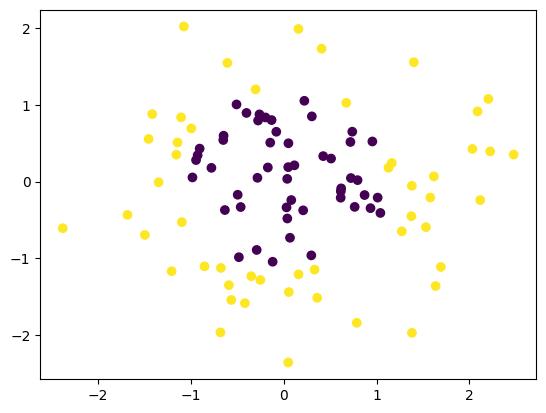

In [471]:
plt.scatter('x1','x2',c='class',data=df2)

In [472]:
#일반적인 Linear SVM으로 분류해보기
linear_svm2 = LinearSVC(C=1,max_iter=10e4).fit(X2,y2)

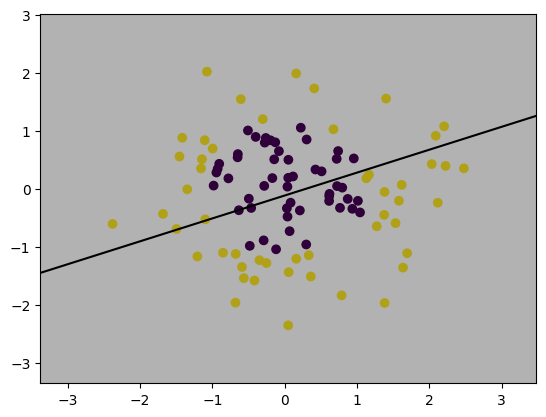

In [477]:
plt.scatter('x1','x2',c='class',data=df2)

coef,intercept = linear_svm2.coef_, linear_svm2.intercept_
plt.plot(line,-(line*coef[:,0]+intercept)/coef[:,1],c=color)
plt.fill_between(line,-(line*coef[:,0]+intercept+1)/coef[:,1],-(line*coef[:,0]+intercept-1)/coef[:,1],color=color,alpha=0.3)

plt.xlim([min(df2['x1'])-1,max(df2['x1'])+1])
plt.ylim([min(df2['x2'])-1,max(df2['x2'])+1])

plt.show()

In [480]:
X2_new = np.hstack((X2,(X2[:,0]**2 + X2[:,1]**2).reshape(-1,1)))

df2 = pd.DataFrame(X2_new,columns=['x1','x2','x3'])
df2['class'] = y2

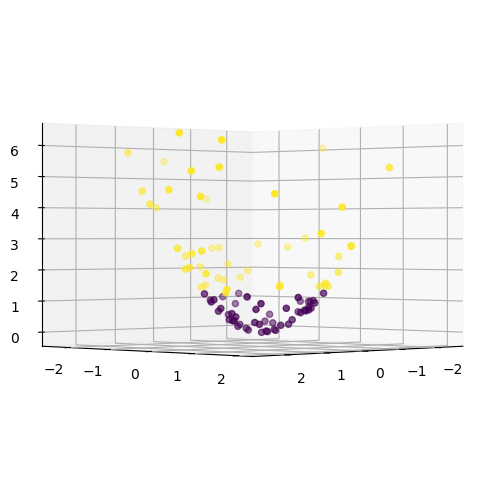

In [481]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111,projection='3d')
ax.scatter(df2['x1'],df2['x2'],df2['x3'],c='class',data=df2)


ax.view_init(0,45)

plt.show()

In [482]:
linear_svm3 = LinearSVC().fit(X2_new,y2)

In [483]:
coef, intercept = linear_svm3.coef_.ravel(), linear_svm3.intercept_

In [484]:
xx = np.linspace(X2_new[:,0].min()-1,X2_new[:,0].max()+1)
yy = np.linspace(X2_new[:,1].min()-1,X2_new[:,1].max()+1)

In [485]:
XX, YY = np.meshgrid(xx,yy)
zz = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
zz1 = (coef[0] * XX + coef[1] * YY + intercept +1) / -coef[2]
zz2 = (coef[0] * XX + coef[1] * YY + intercept -1) / -coef[2]

<function matplotlib.pyplot.show(close=None, block=None)>

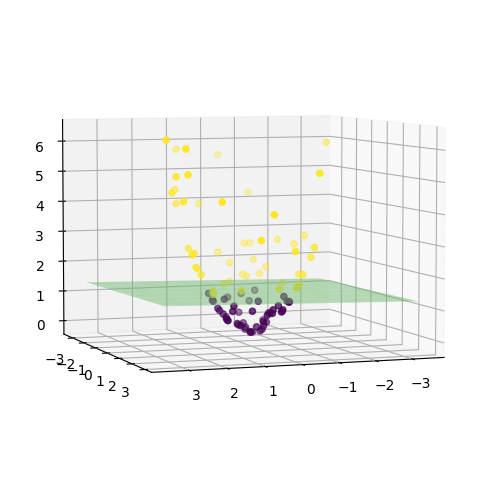

In [490]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(XX, YY, zz, rstride=8, cstride=8, alpha=0.5, color='lightgreen')


ax.scatter(df2['x1'],df2['x2'],df2['x3'],c='class',data=df2)
ax.view_init(5,70)

plt.show

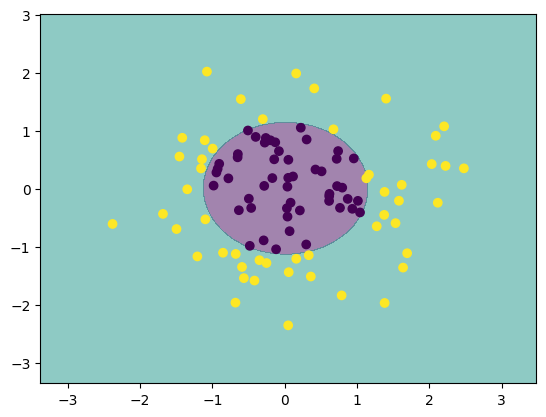

In [491]:
ZZ = XX ** 2 + YY ** 2

# np.ravel : 다차원 배열을 1차원으로 데이터 변환
dec = linear_svm3.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

# plt.contourf : 등고선을 그려준다
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],alpha=0.5)
plt.scatter('x1','x2',c='class',data=df2)

plt.show()